<a href="https://colab.research.google.com/github/othrou/Machine-Learning-Notebooks/blob/master/chameleon_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np    # si pas encore fait
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import metrics

### Metis

In [2]:
!git clone https://github.com/xijunke/METIS-1.git

Cloning into 'METIS-1'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 176 (delta 14), reused 10 (delta 10), pack-reused 99 (from 1)
Receiving objects: 100% (176/176), 9.51 MiB | 12.98 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [3]:
import requests
import tarfile

# Change working directory
%cd /content/METIS-1/metis-5.1.0

# The remaining steps as you have shown in the question, with updated path
!make config shared=1 prefix=~/.local/
!make install
!cp ~/.local/lib/libmetis.so /usr/lib/libmetis.so
!export METIS_DLL=/usr/lib/libmetis.so
!pip3 install metis-python

import metispy as metis

/content/METIS-1/metis-5.1.0
rm -rf build/Linux-x86_64
mkdir -p build/Linux-x86_64
cd build/Linux-x86_64 && cmake /content/METIS-1/metis-5.1.0 -DCMAKE_VERBOSE_MAKEFILE=1 -DGKLIB_PATH=/content/METIS-1/metis-5.1.0/GKlib -DCMAKE_INSTALL_PREFIX=/root/.local/ -DSHARED=1
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info

In [4]:
!pip install networkx==2.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires n

In [1]:
!pip install "numpy<1.24.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5

In [1]:
%cd /content
!git clone https://github.com/Moonpuck/chameleon_cluster.git

/content
Cloning into 'chameleon_cluster'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 32 (from 1)
Receiving objects: 100% (33/33), 87.41 KiB | 3.12 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
!pip install -r chameleon_cluster/requirements.txt

  Preparing metadata (setup.py) ... done
  Created wheel for metis: filename=metis-0.2a5-py3-none-any.whl size=11308 sha256=5303cc2030f398bfb01b4da52f3b5fad564381d33136e1742f367d1441514467
  Stored in directory: /root/.cache/pip/wheels/20/0c/3a/2fe1d1d85fd5d04cb86520271fa12e529b77ba83737e4738fa
Successfully built metis


In [8]:
%cd /content/chameleon_cluster


!python -i /content/chameleon_cluster/main.py

/content/chameleon_cluster
Building kNN graph (k = 20)...
100% 788/788 [00:04<00:00, 184.15it/s]
Begin clustering...
100% 33/33 [00:46<00:00,  1.41s/it]
Figure(640x480)
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


In [11]:
import pandas as pd
dataTo = pd.read_csv("/content/chameleon_cluster/res.csv", sep =",")

In [12]:
dataTo.head(3)

,15.55 28.65
0,14.9 27.55
1,14.45 28.35
2,14.15 28.8


In [15]:
import pandas as pd

from visualization import *
from chameleon import *


In [16]:
df = pd.read_csv('./datasets/Aggregation.csv', sep=' ',header=None)

In [17]:
res = cluster(df, 7, knn=20, m=40, alpha=2.0, plot=False)

Building kNN graph (k = 20)...


100%|██████████| 788/788 [00:03<00:00, 198.72it/s]


Begin clustering...


100%|██████████| 33/33 [00:52<00:00,  1.59s/it]


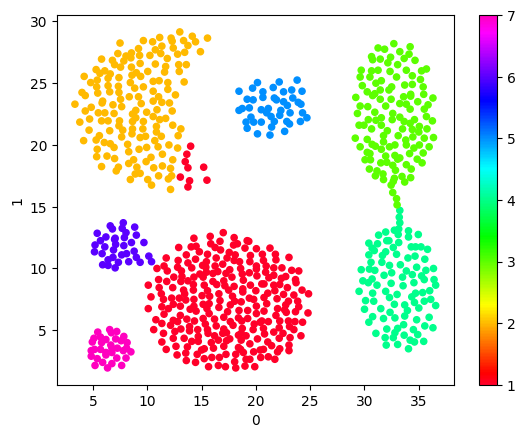

In [18]:
plot2d_data(res)

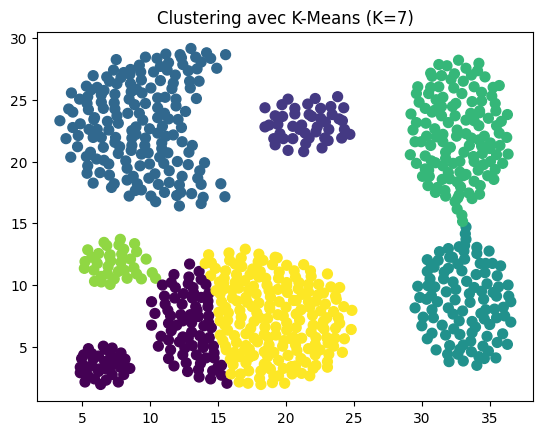

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df.values  # Utilisez les colonnes pertinentes pour le clustering

# Appliquer K-Means avec K = 7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Ajouter les labels des clusters au DataFrame
df['kmeans_cluster'] = kmeans_labels

# Visualiser les résultats
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("Clustering avec K-Means (K=7)")
plt.show()

In [20]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Supposons que `res` contient les résultats de CHAMELEON
chameleon_labels = res['cluster']  # Remplacez par la clé correcte si nécessaire

# Calculer les indices pour CHAMELEON
db_chameleon = davies_bouldin_score(X, chameleon_labels)
silhouette_chameleon = silhouette_score(X, chameleon_labels)

# Calculer les indices pour K-Means
db_kmeans = davies_bouldin_score(X, kmeans_labels)
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# Afficher les résultats
print(f"Indice de Davies-Bouldin pour CHAMELEON : {db_chameleon}")
print(f"Indice de Davies-Bouldin pour K-Means : {db_kmeans}")
print(f"Indice de Silhouette pour CHAMELEON : {silhouette_chameleon}")
print(f"Indice de Silhouette pour K-Means : {silhouette_kmeans}")

Indice de Davies-Bouldin pour CHAMELEON : 0.4507441128162149
Indice de Davies-Bouldin pour K-Means : 0.5924097030089541
Indice de Silhouette pour CHAMELEON : 0.576019090113277
Indice de Silhouette pour K-Means : 0.5475200453293099
